<a href="https://colab.research.google.com/github/bethelchoto/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES


# IMPORT DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# importing both train and testing dataSets
data_train = os.path.abspath("/content/drive/My Drive/Customer_Segmentation/Train.csv")
data_test = os.path.abspath("/content/drive/My Drive/Customer_Segmentation/Test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Training Data loading 
train_dr = pd.read_csv(data_train)

#Testing Data loading
test_dr = pd.read_csv(data_test)

#Dropping Unnecessary Columns 

In [ ]:
#Droping Graduated Column
train_dr.drop(['Graduated'], axis =1, inplace=True)
test_dr.drop(['Graduated'], axis=1, inplace = True)

In [ ]:
#Testing Information
test_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Var_1            2595 non-null   object 
 9   Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [ ]:
#Training data Information
train_dr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Profession       7944 non-null   object 
 5   Work_Experience  7239 non-null   float64
 6   Spending_Score   8068 non-null   object 
 7   Family_Size      7733 non-null   float64
 8   Var_1            7992 non-null   object 
 9   Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 630.4+ KB


In [ ]:
#Checking for missing values
test_dr.isnull().sum()
# This will drop all rows in which there is any missing values on train data
train_dr=train_dr.dropna()
train_dr.isnull().sum()
# This will drop all rows in which there is any missing values on test data 
test_dr=test_dr.dropna()
test_dr.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

#Visualizing DataSet

In [ ]:
# Data Classifying 
# Categorical Values
cat_data =  ['Gender','Ever_Married','Profession' ,'Spending_Score' , 'Var_1']

#Numerical Values
nume_vl  = ['Age','Work_Experience','Family_Size']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


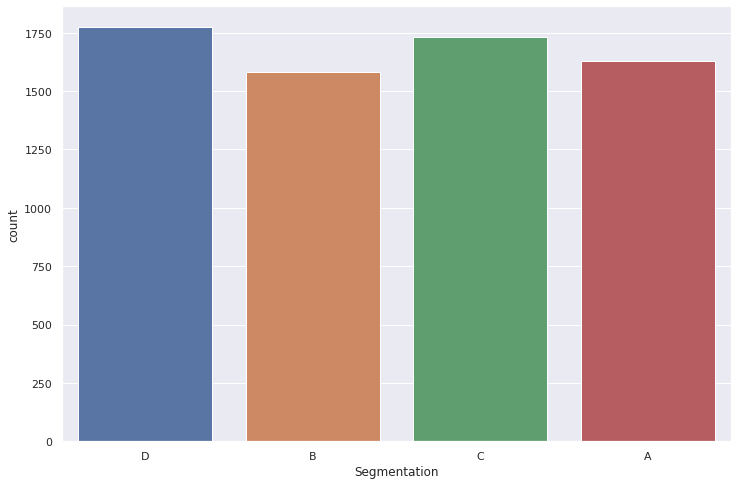

In [ ]:
sns.set_theme()
train_dr['Segmentation'].value_counts()
plt.figure(figsize= (12,8))
sns.countplot(train_dr['Segmentation'])
plt.show()

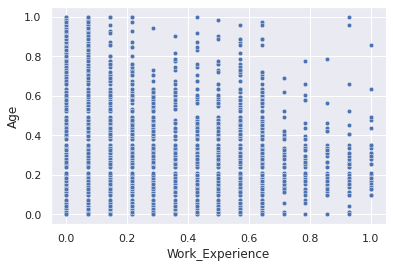

In [ ]:
#Scatter Plot of Work Experience vs Age 
sns.scatterplot(x = 'Work_Experience', y = 'Age', data = train_dr, s = 20)

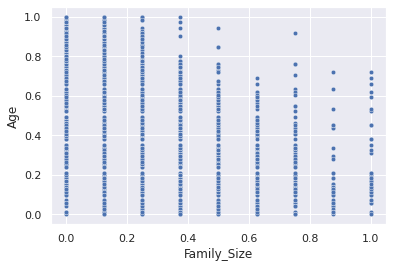

In [ ]:
dat = sns.scatterplot(data = train_dr, x = 'Family_Size', y = 'Age', s = 20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11140bc950>,
      dtype=object)

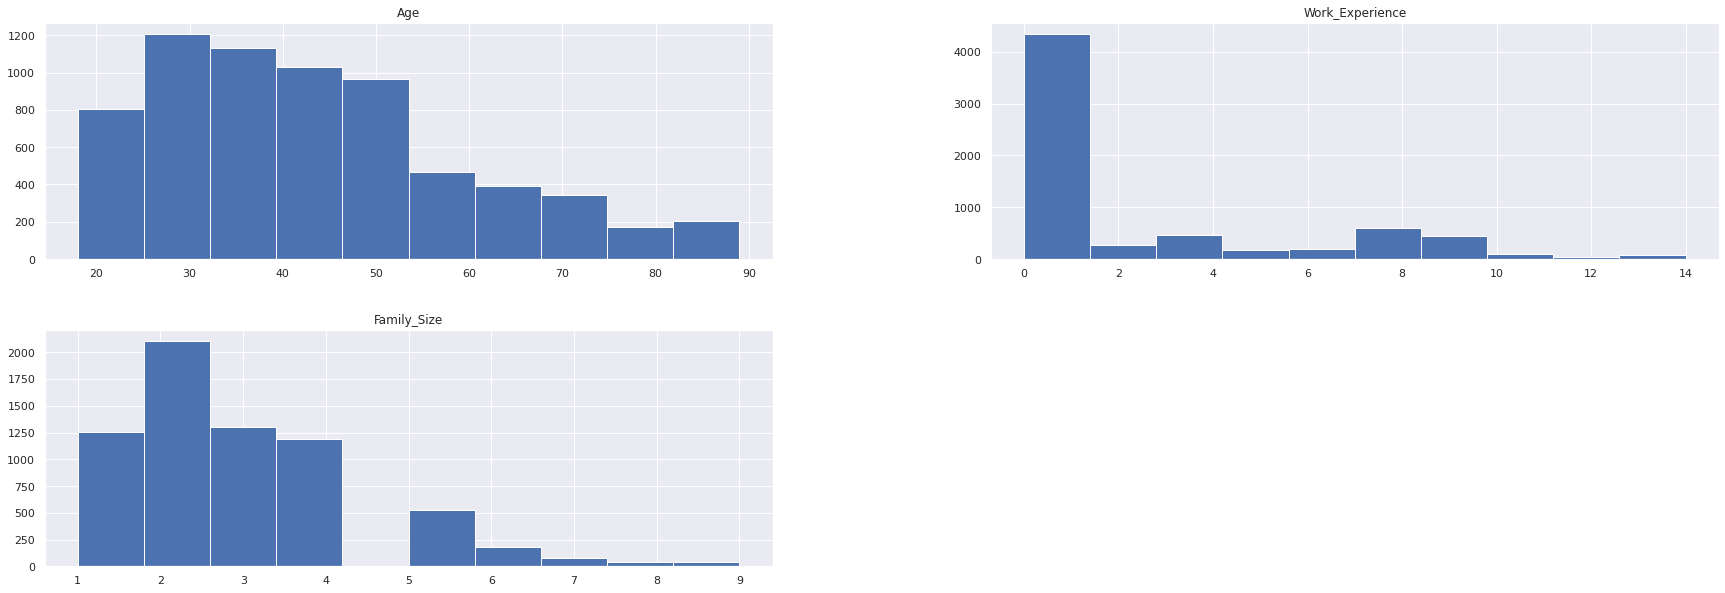

In [ ]:
train_dr[nume_vl].hist(figsize = (30, 10))

In [ ]:
# Train data
dummies = pd.get_dummies(data = train_dr[cat_data])
train_dr = pd.concat([train_dr,dummies],axis = 1)
train_dr.drop(['Gender','Ever_Married','Profession','Spending_Score','Var_1'] ,axis = 1,inplace = True)

# Test data
dummies_test = pd.get_dummies(data = test_dr[['Gender','Ever_Married','Profession','Spending_Score','Var_1']])
test_dr = pd.concat([test_dr,dummies_test],axis = 1)
test_dr.drop(['Gender', 'Ever_Married','Profession', 'Spending_Score','Var_1'],axis = 1,inplace = True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = scaler.fit_transform(pd.DataFrame(df[col]))
    return df
train_dr = scaleColumns(train_dr,nume_vl)

test_dr = scaleColumns(test_dr,nume_vl)
train_dr.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0.056338,0.071429,0.375,D,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,466315,0.690141,0.071429,0.000,B,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,0.690141,0.000000,0.125,B,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,461319,0.535211,0.000000,0.125,C,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
6,460156,0.197183,0.071429,0.250,C,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


Changing the Encoding of Segmentation column from (A, B, C, D ) into numbers (1,2,3,4)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_dr['Segmentation'] = le.fit_transform(train_dr['Segmentation'])

train_dr.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0.056338,0.071429,0.375,3,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,466315,0.690141,0.071429,0.000,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,0.690141,0.000000,0.125,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,461319,0.535211,0.000000,0.125,2,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
6,460156,0.197183,0.071429,0.250,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


#Training And Testing Splitting

In [ ]:
from re import X
from pandas.tseries.frequencies import unique
from sklearn.model_selection import train_test_split 

aim = ['Segmentation']
unique_identifier = ['ID']

method = [x for x in train_dr.columns if x not in aim+unique_identifier]

X = train_dr[method].values
y = train_dr[aim].values

X.shape, y.shape
y= train_dr[aim].values

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

X_train.shape, X_test.shape

((5374, 26), (1344, 26))

#KMeans Algorithm

In [ ]:
from sklearn.cluster import KMeans 
from sklearn.metrics import confusion_matrix, classification_report

kmean_algo = (KMeans(n_clusters = 4,  init = 'k-means++', n_init =10, max_iter=300,tol=0.0001, random_state = 111, algorithm = 'elkan'))
kmean_algo.fit(X_train)
labels = kmean_algo.labels_
centroids = kmean_algo.cluster_centers_
confusion_mtx = confusion_matrix(y_train, labels)

print("Confusion Matrix")
print(confusion_mtx)
print("Classification Report")
print(classification_report(y_train,labels))

Confusion Matrix
[[285 478 224 307]
 [380 550 138 206]
 [481 621 115 150]
 [122 268 566 483]]
Classification Report
              precision    recall  f1-score   support

           0       0.22      0.22      0.22      1294
           1       0.29      0.43      0.34      1274
           2       0.11      0.08      0.10      1367
           3       0.42      0.34      0.37      1439

    accuracy                           0.27      5374
   macro avg       0.26      0.27      0.26      5374
weighted avg       0.26      0.27      0.26      5374



Accuracy rate of the Kmeans is 19%

#KNN ALGORITHM

In [ ]:
# Checking fro accurancy in train and test data
from sklearn.neighbors import KNeighborsClassifier
testing_values = []
training_values = []

for i in range(1,15):
  
  KNN = KNeighborsClassifier(i)
  KNN.fit(X_train, y_train)

  training_values.append(KNN.score(X_train, y_train))
  testing_values.append(KNN.score(X_test, y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
test_dr.head()
train_dr.head()

,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,462809,0.056338,0.071429,0.375,3,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,466315,0.690141,0.071429,0.000,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,461735,0.690141,0.000000,0.125,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,461319,0.535211,0.000000,0.125,2,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
6,460156,0.197183,0.071429,0.250,2,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
#Finding the Max Value from training DataSET
train_max_score = max(training_values)
for i, num in enumerate(training_values):
  if num == train_max_score:
    train_num = i+1
train_num, train_max_score


(1, 0.9469668775586155)

training value has 94%

In [ ]:
#Finding the Max Value from testing DataSET
test_max_score = max(testing_values)
for i, num in enumerate(testing_values):
  if num == test_max_score:
    test_num = i+1
test_num, test_max_score

(13, 0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


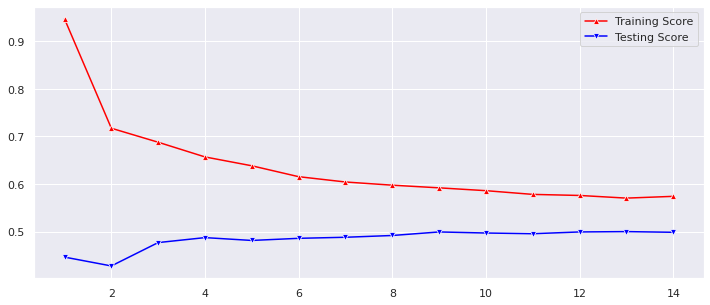

In [ ]:
#Graphs of Train Scores and Testing Score
plt.figure(figsize= (12,5))
pltd = sns.lineplot(range(1,15), training_values, marker = '^', label ='Training Score', color = 'red')
pltd = sns.lineplot(range(1,15), testing_values, marker = 'v', label = 'Testing Score', color = 'blue')

#Checking for Accuracy

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
y_prediction = KNN.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test, y_prediction), '\n')
print('Report')
print(classification_report(y_test, y_prediction))

Confusion Matrix
[[141  81  44  71]
 [ 69 113  86  40]
 [ 37  83 189  55]
 [ 63  30  15 227]] 

Report
              precision    recall  f1-score   support

           0       0.45      0.42      0.44       337
           1       0.37      0.37      0.37       308
           2       0.57      0.52      0.54       364
           3       0.58      0.68      0.62       335

    accuracy                           0.50      1344
   macro avg       0.49      0.50      0.49      1344
weighted avg       0.50      0.50      0.50      1344



51% Accuracy

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
clusters = km.fit_predict(train_dr.iloc[:,1:])
clusters

array([2, 3, 4, ..., 2, 0, 4], dtype=int32)

[2 3 4 ... 2 0 4]


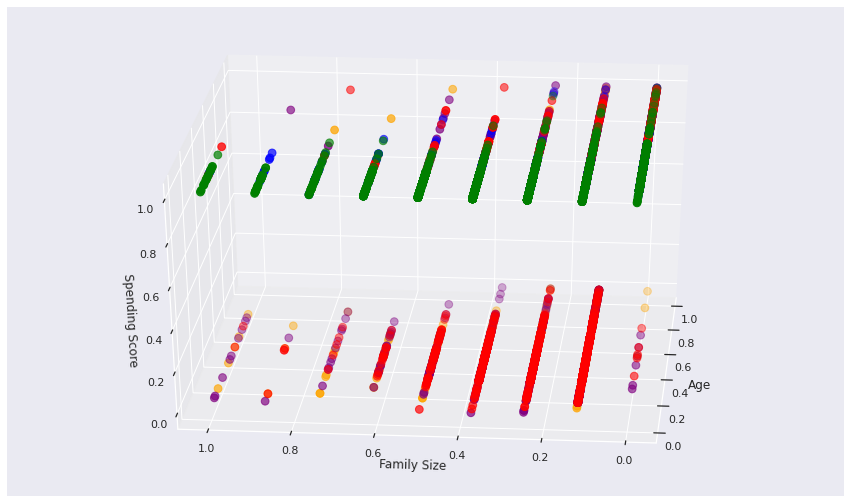

In [ ]:
print(clusters)
train_dr["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(train_dr.Age[train_dr.label == 0], train_dr["Family_Size"][train_dr.label == 0], train_dr["Spending_Score_Low"][train_dr.label == 0], c='blue', s=60)
ax.scatter(train_dr.Age[train_dr.label == 1], train_dr["Family_Size"][train_dr.label == 1], train_dr["Spending_Score_Low"][train_dr.label == 1], c='red', s=60)
ax.scatter(train_dr.Age[train_dr.label == 2], train_dr["Family_Size"][train_dr.label == 2], train_dr["Spending_Score_Low"][train_dr.label == 2], c='green', s=60)
ax.scatter(train_dr.Age[train_dr.label == 3], train_dr["Family_Size"][train_dr.label == 3], train_dr["Spending_Score_Low"][train_dr.label == 3], c='orange', s=60)
ax.scatter(train_dr.Age[train_dr.label == 4], train_dr["Family_Size"][train_dr.label == 4], train_dr["Spending_Score_Low"][train_dr.label == 4], c='purple', s=60)

ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Family Size")
ax.set_zlabel('Spending Score')
plt.show()

#Testing Data Prediction

In [ ]:
#REPLACING THE NUMBERICAL (1,2,3,4) VALUES IN SEGMENTATION WITH LETTERS (A,B,C,D,E)
test_dr['Segmentation'] = KNN.predict(test_dr[method])

test_dr['Segmentation'] = test_dr['Segmentation'].apply(str)
mapping = {'0':'A', '1':'B','2':'C','3':'D'}
test_dr['Segmentation'] = test_dr['Segmentation'].replace({'0':'A', '1':'B','2':'C','3':'D'})
test_dr.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,ID,Age,Work_Experience,Family_Size,Segmentation,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Profession_Artist,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,458989,0.253521,0.000000,0.000,A,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
1,458994,0.267606,0.571429,0.375,A,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
3,459000,0.577465,0.785714,0.125,C,0,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
5,459003,0.408451,0.000000,0.500,B,0,1,0,1,0,...,0,1,0,0,0,0,1,0,0,0
6,459005,0.605634,0.357143,0.250,A,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
